# Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\Akira\Documents\Advanced Analytics and Dashboard Design Project"

In [4]:
NBA = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'NBA.csv'), index_col = False)

In [5]:
NBA.shape

(12844, 23)

In [6]:
NBA.head()

,player_name,team_abbreviation,Team City,Team_State,age,player_height,player_weight,college,country,draft_year,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,Houston,Texas,22,193.04,94.800728,Louisiana State,USA,1996,...,3.9,1.5,2.4,0.3,4%,4%,4%,4%,4%,1996-97
1,Gaylon Nickerson,WAS,Washington,District of Columbia,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,...,3.8,1.3,0.3,8.9,3%,11%,17%,50%,3%,1996-97
2,George Lynch,VAN,Vancouver,Canada,26,203.20,103.418976,North Carolina,USA,1993,...,8.3,6.4,1.9,-8.2,11%,19%,18%,51%,11%,1996-97
3,George McCloud,LAL,Los Angeles,California,30,203.20,102.058200,Florida State,USA,1989,...,10.2,2.8,1.7,-2.7,3%,11%,21%,53%,3%,1996-97
4,George Zidek,DEN,Denver,Colorado,23,213.36,119.748288,UCLA,USA,1995,...,2.8,1.7,0.3,-14.1,10%,17%,20%,50%,10%,1996-97


In [7]:
NBA.dtypes

player_name           object
team_abbreviation     object
Team City             object
Team_State            object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct              object
dreb_pct              object
usg_pct               object
ts_pct                object
ast_pct               object
season                object
dtype: object

In [8]:
# Creating a dataframe with only statistical columns
columns = ['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast']

In [9]:
df_NBA = NBA[columns]

### Elbow Technique to determine number of clusters

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_NBA).score(df_NBA) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Akira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Akira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Akira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Akira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-11958069.869117865,
 -5595439.387507916,
 -4324283.241977174,
 -3501806.150480653,
 -2977855.371369448,
 -2572282.772290141,
 -2353844.959137705,
 -2177482.75611822,
 -2029979.0363215953]

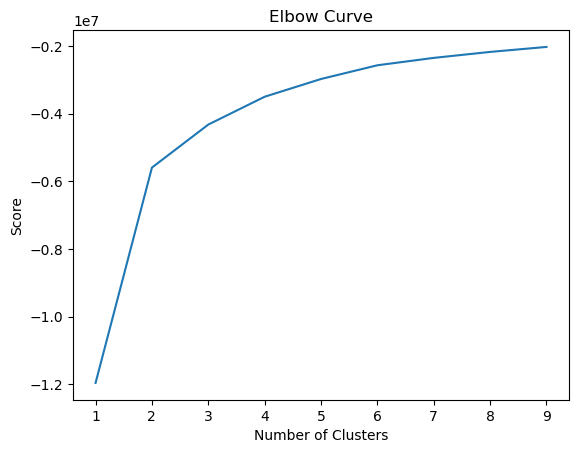

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### When looking at this elbow curve, I can see that there is a large jump from 1-2, and then a smaller jump from 2-3. After 3 the curve begins to straighten out, and so I will be using 3 as the number of clusters for this analysis.

## K-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_NBA)

C:\Users\Akira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
df_NBA['clusters'] = kmeans.fit_predict(df_NBA)

C:\Users\Akira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Akira\AppData\Local\Temp\ipykernel_16364\839623201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NBA['clusters'] = kmeans.fit_predict(df_NBA)


In [16]:
df_NBA.head()

,age,player_height,player_weight,gp,pts,reb,ast,clusters
0,22,193.04,94.800728,64,3.9,1.5,2.4,2
1,28,190.50,86.182480,4,3.8,1.3,0.3,1
2,26,203.20,103.418976,41,8.3,6.4,1.9,1
3,30,203.20,102.058200,64,10.2,2.8,1.7,0
4,23,213.36,119.748288,52,2.8,1.7,0.3,0


In [17]:
df_NBA['clusters'].value_counts()

clusters
0    4603
1    4294
2    3947
Name: count, dtype: int64

## Adding the cluster column to the original data set

In [22]:
NBA['cluster_column'] = df_NBA['clusters']

In [33]:
NBA.head()

,player_name,team_abbreviation,Team City,Team_State,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,cluster_column
0,Randy Livingston,HOU,Houston,Texas,22,193.04,94.800728,Louisiana State,USA,1996,...,1.5,2.4,0.3,4%,4%,4%,4%,4%,1996-97,2
1,Gaylon Nickerson,WAS,Washington,District of Columbia,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,...,1.3,0.3,8.9,3%,11%,17%,50%,3%,1996-97,1
2,George Lynch,VAN,Vancouver,Canada,26,203.20,103.418976,North Carolina,USA,1993,...,6.4,1.9,-8.2,11%,19%,18%,51%,11%,1996-97,1
3,George McCloud,LAL,Los Angeles,California,30,203.20,102.058200,Florida State,USA,1989,...,2.8,1.7,-2.7,3%,11%,21%,53%,3%,1996-97,0
4,George Zidek,DEN,Denver,Colorado,23,213.36,119.748288,UCLA,USA,1995,...,1.7,0.3,-14.1,10%,17%,20%,50%,10%,1996-97,0


In [42]:
single_column = NBA['cluster_column']

In [47]:
single_column.count()

12844

In [48]:
NBA.to_csv(os.path.join(path, 'Data','Prepared Data', 'NBA_cluster.csv'))

## Cluster Visualizations

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


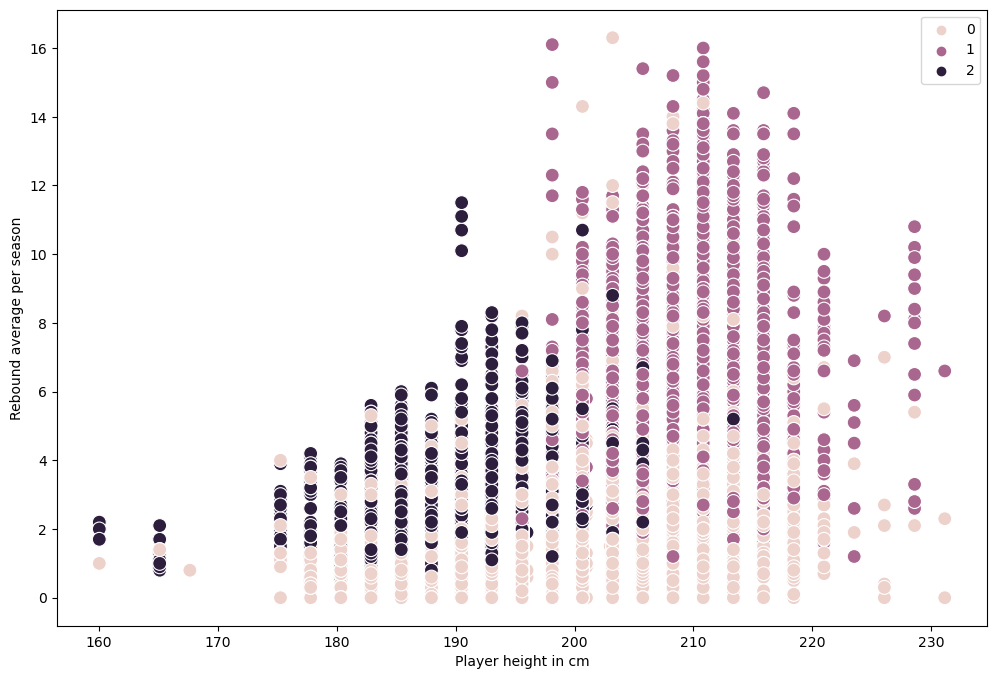

In [34]:
# comparing clusters for player height and rebounds
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_NBA['player_height'], y=df_NBA['reb'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Player height in cm') # Label x-axis.
plt.ylabel('Rebound average per season') # Label y-axis.
plt.show()

#### This visualization is a comparison of player height and rebounds. This visualization shows a clear trend that taller players will average more rebounds per season. I do seem to find some outliers of players with only 190 cm of height that averaged 10-12 rebounds per game. I would love to conduct a future analysis of who those players are, and what impact he had on the regular/post season.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


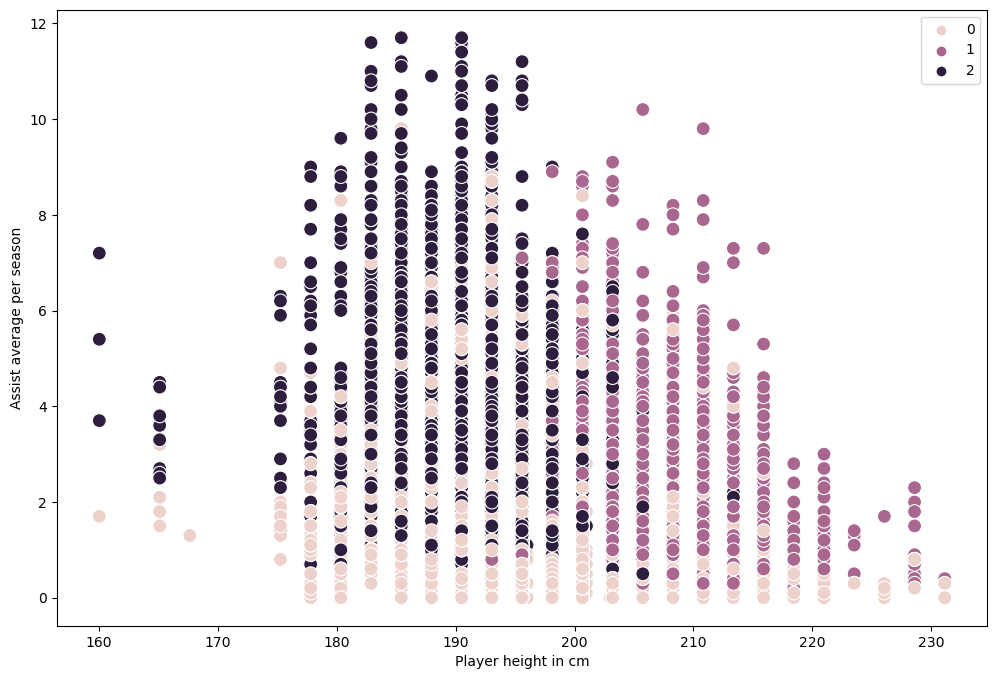

In [36]:
# comparing clusters for player height and assists
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_NBA['player_height'], y=df_NBA['ast'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Player height in cm') # Label x-axis.
plt.ylabel('Assist average per season') # Label y-axis.
plt.show()

#### In the previous exercise, I hypothesized that players with increased height performed better in NBA statistics, in this first visualization I can see that the purple dots represent players with height and perform well in assists, pink dots represent players that majority do not perform high but range in height, and the dark purple dots represent players with less height but vary in assists per season. So far, I can see that players with the highest assists range from 180-200 cm, however there are two outliers of players with height that ranges from 205-215 cm with an average of 10 assists per season. I would like to do further analysis on those players and how they impacted their team's post season.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


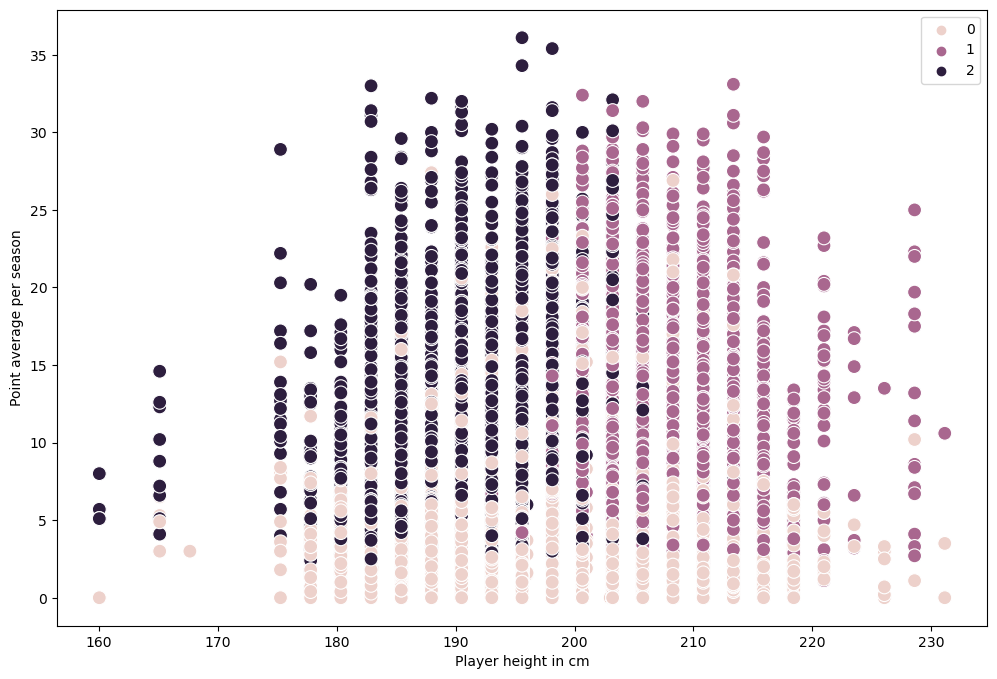

In [37]:
# comparing clusters for player height and points
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_NBA['player_height'], y=df_NBA['pts'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Player height in cm') # Label x-axis.
plt.ylabel('Point average per season') # Label y-axis.
plt.show()

#### This visualization compares player height with points per season. Unlike assists, taller players seem to average similar points to those with lesser heights. Based on this visualization I can say there is a pattern of players within the purple and dark purple cluster that can perform high levels of basketball output while ranging in heights. This can disprove the hypothesis that if a player is taller, than he is more likely to perform better in NBA statistics. Another future analysis is analyzing the players in the two top clusters and seeing who is currently playing in the NBA, which can help define a player's stock and how they can earn a high contract in the NBA

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


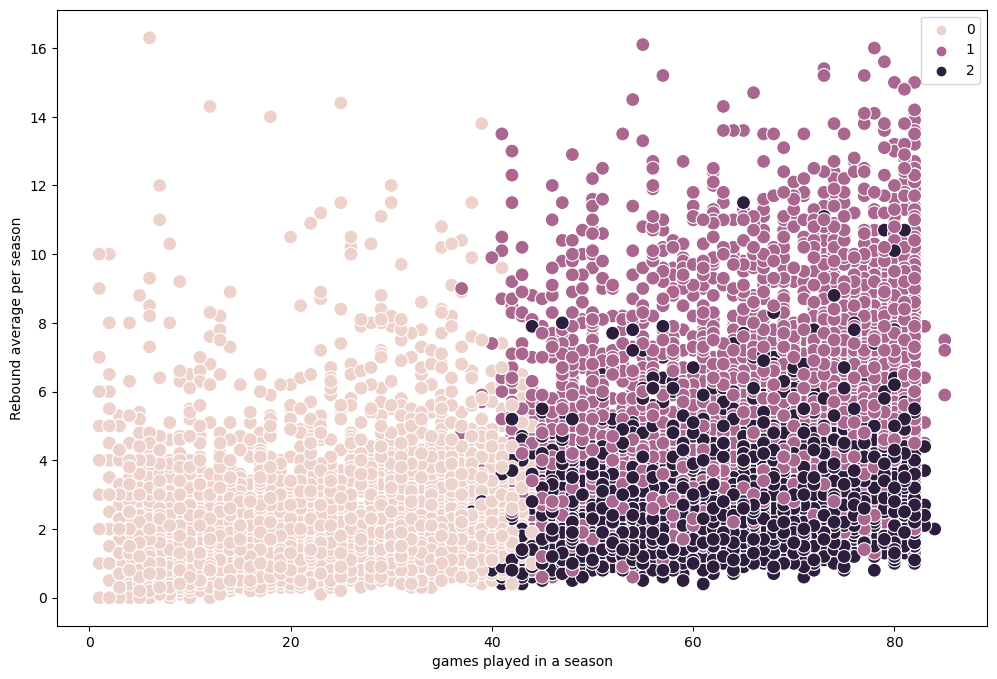

In [38]:
# comparing clusters for games played and rebounds
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_NBA['gp'], y=df_NBA['reb'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('games played in a season') # Label x-axis.
plt.ylabel('Rebound average per season') # Label y-axis.
plt.show()

#### This visualization is a scatterplot comparing games played vs rebounds per season. An interesting observation is how purple players ( those with heigher heights) seem to average 40-80 NBA games per season while averaging a high level of rebounds for an entire season. My thought process is seeing which teams these players play for, and if certain players were to play together would affect their output.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


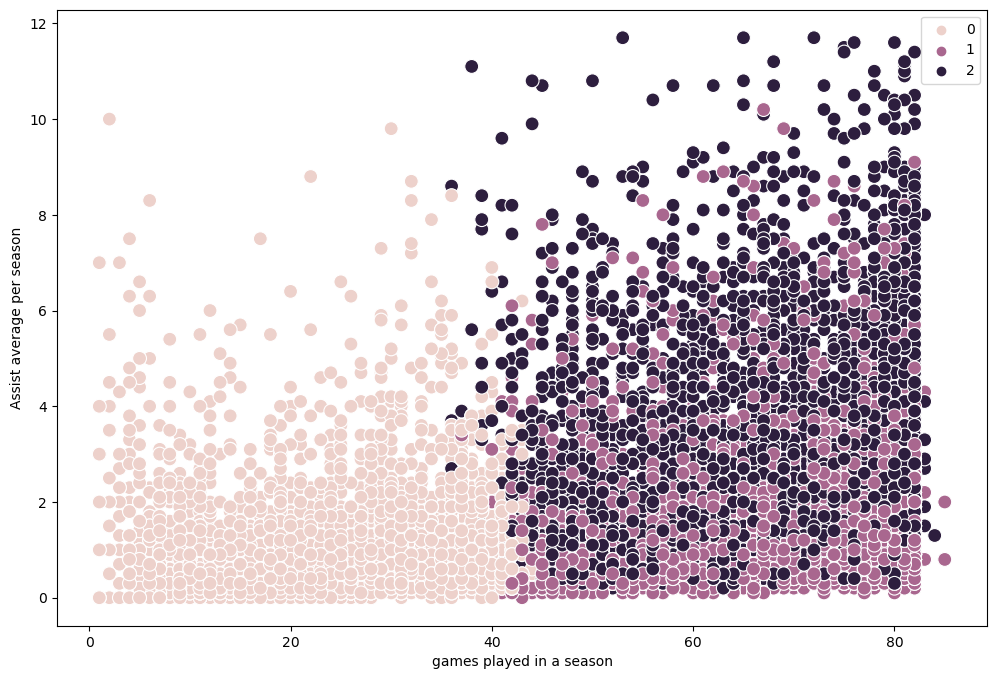

In [39]:
# comparing clusters for games played and assists
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_NBA['gp'], y=df_NBA['ast'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('games played in a season') # Label x-axis.
plt.ylabel('Assist average per season') # Label y-axis.
plt.show()

#### This visualization of games played vs assist average is interesting because this is where you see the purple cluster struggle to prouce assists. The dark purple cluster seem to exceed in this category, which is great to see how players can impact the game without physical height. Some outliers I see is the pink cluster who averaged less than 40 games per season but were able to average around 10 assists per game. Those players could show some hidden potential that would be effective for certain NBA teams.

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


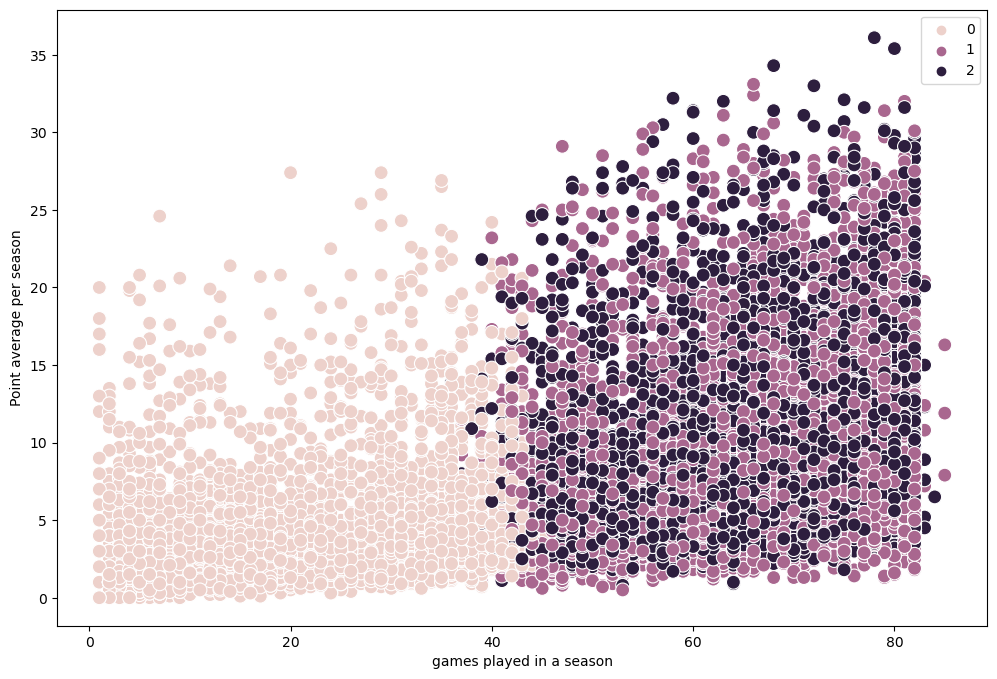

In [40]:
# comparing clusters for games played and points
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_NBA['gp'], y=df_NBA['pts'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('games played in a season') # Label x-axis.
plt.ylabel('Point average per season') # Label y-axis.
plt.show()

#### This visualization compares games played and points per average. This is an interesting viewing because the purple and dark purple cluster seem to average similar points and games played. Two of the dark purple cluster dots stand out for me, those that played nearly 80 games and averaged 35+ points per game. That is an interesting study in how those players were able to perform like that. Another outlier is the pink cluster for those players that played less than 40 games but averaged 25-30 points per game. I would like to analyze these outlier players and see more into their basketball history and discovering factors that contributed them to perform so well in the NBA in just a small amount of games.

### Cluster Profile

In [41]:
df_NBA.loc[df_NBA['clusters'] == 2, 'cluster'] = 'dark purple'
df_NBA.loc[df_NBA['clusters'] == 1, 'cluster'] = 'purple'
df_NBA.loc[df_NBA['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Akira\AppData\Local\Temp\ipykernel_2060\993978525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NBA.loc[df_NBA['clusters'] == 2, 'cluster'] = 'dark purple'
C:\Users\Akira\AppData\Local\Temp\ipykernel_2060\993978525.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_NBA.loc[df_NBA['clusters'] == 2, 'cluster'] = 'dark purple'


In [42]:
df_NBA.groupby('cluster').agg({'age':['mean', 'median'], 
                         'player_height':['mean', 'median'], 
                         'player_weight':['mean', 'median'],
                          'gp':['mean', 'median'],
                          'ast':['mean', 'median'],
                            'reb':['mean', 'median'],
                              'pts':['mean', 'median']})

age        player_height         player_weight             \
                  mean median          mean  median          mean     median   
cluster                                                                        
dark purple  27.093434   27.0    192.768874  193.04     89.584786   90.71840   
pink         26.627848   25.0    200.688322  200.66    100.004494   99.79024   
purple       27.395679   27.0    207.159267  205.74    109.735153  108.86208   

                    gp              ast              reb               pts  \
                  mean median      mean median      mean median       mean   
cluster                                                                      
dark purple  66.527020   68.0  3.130859    2.5  2.944672    2.8  10.658788   
pink         20.240353   20.0  0.930056    0.6  2.085797    1.7   4.123640   
purple       66.892842   69.0  1.535770    1.2  5.471672    5.0   9.937516   

                    
            median  
cluster             
dark purple    9.4  
pink           3.0  
purple         8.5

### Based on the analysis, this information can be useful in future analysis in understanding what kind of players can be intricate in future NBA teams. For example, in the data there are players in the purple cluster that can generate points, assists, rebounds, and is available to play majority of games in the regular season. NBA team executives would love to know who those players are because those assets can be key in creating an exciting team that will result in increased ticket sales and potentially a better team that has a chance to perform in the post season.